# Project: Markov chains and the supermarket

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px

plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use("ggplot")

## 1. Data exploration and preparation

In [2]:
monday = pd.read_csv("data/monday.csv", sep=";", parse_dates=["timestamp"])
tuesday = pd.read_csv("data/tuesday.csv", sep=";", parse_dates=["timestamp"])
wednesday = pd.read_csv("data/wednesday.csv", sep=";", parse_dates=["timestamp"])
thursday = pd.read_csv("data/thursday.csv", sep=";", parse_dates=["timestamp"])
friday = pd.read_csv("data/friday.csv", sep=";", parse_dates=["timestamp"])

In [3]:
frames = monday, tuesday, wednesday, thursday, friday
monday["day"] = "monday"
tuesday["day"] = "tuesday"
wednesday["day"] = "wednesday"
thursday["day"] = "thursday"
friday["day"] = "friday"

In [4]:
week = pd.concat(frames).reset_index()
week.head()

,index,timestamp,customer_no,location,day
0,0,2019-09-02 07:03:00,1,dairy,monday
1,1,2019-09-02 07:03:00,2,dairy,monday
2,2,2019-09-02 07:04:00,3,dairy,monday
3,3,2019-09-02 07:04:00,4,dairy,monday
4,4,2019-09-02 07:04:00,5,spices,monday


### Calculate the total number of customers in each section

In [24]:
week_count = week.groupby(['timestamp', "location", "day"]).agg({"customer_no":"count"}).reset_index()
week_count.rename(columns={"customer_no":"count"}, inplace=True)
week_count.head()

,timestamp,location,day,count
0,2019-09-02 07:03:00,dairy,monday,2
1,2019-09-02 07:04:00,dairy,monday,2
2,2019-09-02 07:04:00,fruit,monday,1
3,2019-09-02 07:04:00,spices,monday,3
4,2019-09-02 07:05:00,checkout,monday,2


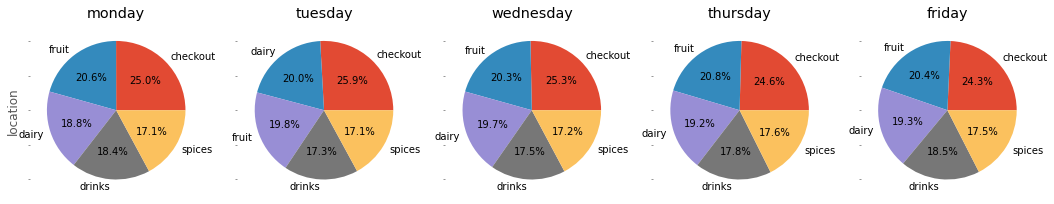

In [91]:
days = week["day"].unique()
f, axes = plt.subplots(1, 5, sharey=True, figsize=(18, 8))
for i, (ax, day) in enumerate(zip(axes, days)):
    week_count.loc[week_count["day"]==day]["location"].value_counts().plot(kind="pie", 
                                                                           autopct='%1.1f%%', 
                                                                           title=day,
                                                                           ax=ax)

### Display cumulated number of customers in each section

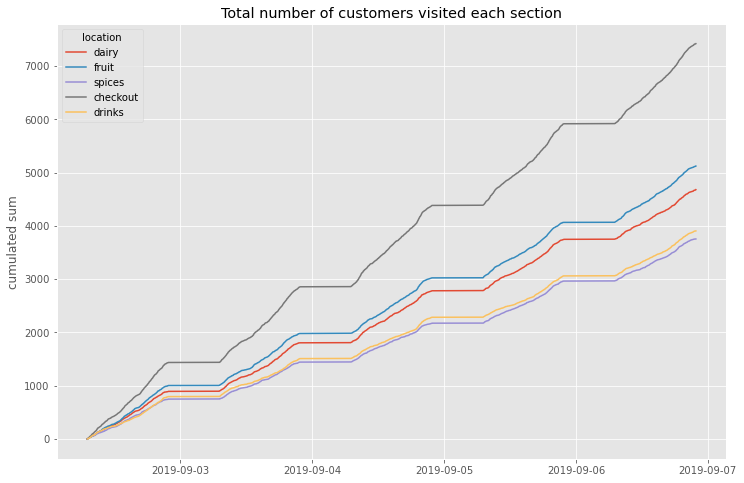

In [88]:
week_count["cumsum"] = week_count.groupby(["location"])["count"].cumsum()

fig, ax = plt.subplots(1, 1)
sns.lineplot(data=week_count, x="timestamp", y="cumsum", hue="location", ax=ax)
ax.set_ylabel("cumulated sum")
ax.set_xlabel("")
ax.set_title("Total number of customers visited each section");

### Display the number of customers at checkout over time

In [89]:
checked_out = week_count[week_count["location"]=="checkout"]

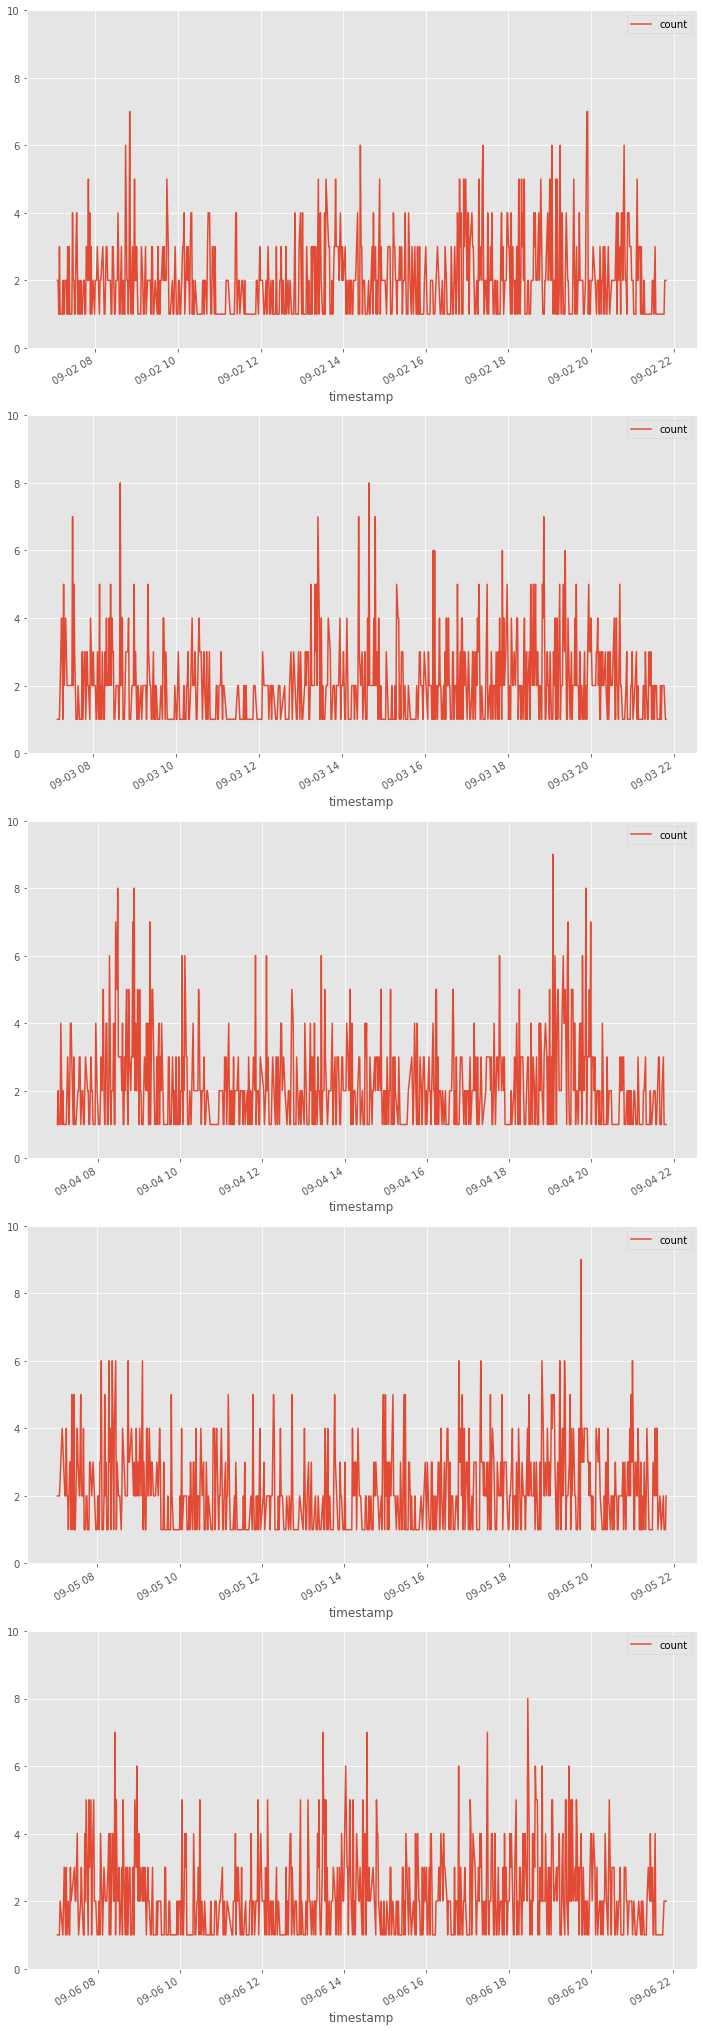

In [100]:
fig, axes = plt.subplots(5, 1, figsize=(12, 40))
for ax, day in zip(axes, days):
    checked_out.loc[checked_out["day"]==day].plot(x="timestamp", y="count", ax=ax)
    ax.set_ylim([0, 10])

### Calculate the time each customer spent in the market

In [135]:
week = pd.concat(frames).reset_index()
week.head()

,index,timestamp,customer_no,location,day
0,0,2019-09-02 07:03:00,1,dairy,monday
1,1,2019-09-02 07:03:00,2,dairy,monday
2,2,2019-09-02 07:04:00,3,dairy,monday
3,3,2019-09-02 07:04:00,4,dairy,monday
4,4,2019-09-02 07:04:00,5,spices,monday


In [136]:
customer_time = week.groupby(["customer_no", "day"])["timestamp"].min().reset_index().rename(columns={"timestamp":"start"})
customer_time["end"] = week.groupby(["customer_no", "day"])["timestamp"].max().reset_index()["timestamp"]

In [137]:
customer_time["time spend in min"] = (customer_time["end"] - customer_time["start"]).dt.seconds/60

In [138]:
customer_time

,customer_no,day,start,end,time spend in min
0,1,friday,2019-09-06 07:00:00,2019-09-06 07:05:00,5.0
1,1,monday,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0
2,1,thursday,2019-09-05 07:00:00,2019-09-05 07:02:00,2.0
3,1,tuesday,2019-09-03 07:02:00,2019-09-03 07:12:00,10.0
4,1,wednesday,2019-09-04 07:00:00,2019-09-04 07:02:00,2.0
...,...,...,...,...,...
7440,1531,wednesday,2019-09-04 21:46:00,2019-09-04 21:49:00,3.0
7441,1532,thursday,2019-09-05 21:48:00,2019-09-05 21:48:00,0.0
7442,1533,thursday,2019-09-05 21:48:00,2019-09-05 21:48:00,0.0
7443,1534,thursday,2019-09-05 21:48:00,2019-09-05 21:49:00,1.0


In [139]:
customer_time["total time"] = customer_time.groupby("customer_no")["time spend in min"].transform(lambda x: sum(x))

In [140]:
customer_time

,customer_no,day,start,end,time spend in min,total time
0,1,friday,2019-09-06 07:00:00,2019-09-06 07:05:00,5.0,21.0
1,1,monday,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0,21.0
2,1,thursday,2019-09-05 07:00:00,2019-09-05 07:02:00,2.0,21.0
3,1,tuesday,2019-09-03 07:02:00,2019-09-03 07:12:00,10.0,21.0
4,1,wednesday,2019-09-04 07:00:00,2019-09-04 07:02:00,2.0,21.0
...,...,...,...,...,...,...
7440,1531,wednesday,2019-09-04 21:46:00,2019-09-04 21:49:00,3.0,6.0
7441,1532,thursday,2019-09-05 21:48:00,2019-09-05 21:48:00,0.0,0.0
7442,1533,thursday,2019-09-05 21:48:00,2019-09-05 21:48:00,0.0,0.0
7443,1534,thursday,2019-09-05 21:48:00,2019-09-05 21:49:00,1.0,1.0


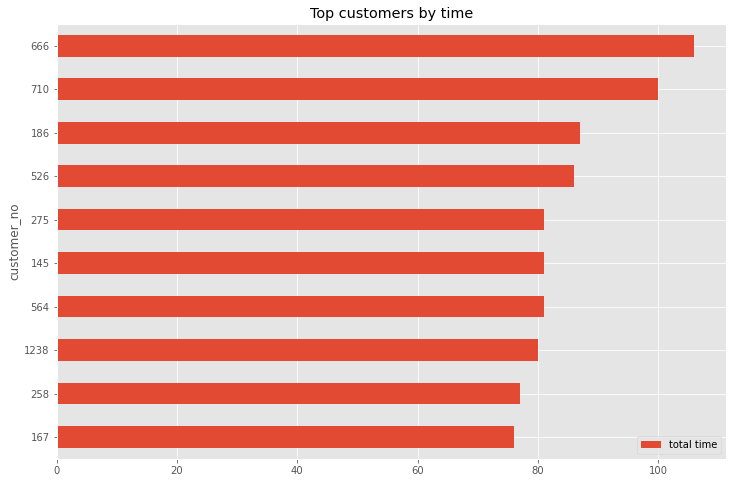

In [141]:
top_customers = pd.DataFrame(customer_time.groupby(["customer_no"])["total time"].max().sort_values(ascending=False)[:10])
top_customers.sort_values(by=["total time"]).plot.barh(title="Top customers by time");

In [142]:
week["time spend in min"] = week.groupby(["customer_no", "day"])["timestamp"].transform(lambda x: max(x) - min(x)).dt.seconds/60

### Calculate the total number of customers in the supermarket over time.

In [144]:
customer_time.head(10)

,customer_no,day,start,end,time spend in min,total time
0,1,friday,2019-09-06 07:00:00,2019-09-06 07:05:00,5.0,21.0
1,1,monday,2019-09-02 07:03:00,2019-09-02 07:05:00,2.0,21.0
2,1,thursday,2019-09-05 07:00:00,2019-09-05 07:02:00,2.0,21.0
3,1,tuesday,2019-09-03 07:02:00,2019-09-03 07:12:00,10.0,21.0
4,1,wednesday,2019-09-04 07:00:00,2019-09-04 07:02:00,2.0,21.0
5,2,friday,2019-09-06 07:00:00,2019-09-06 07:01:00,1.0,29.0
6,2,monday,2019-09-02 07:03:00,2019-09-02 07:06:00,3.0,29.0
7,2,thursday,2019-09-05 07:01:00,2019-09-05 07:05:00,4.0,29.0
8,2,tuesday,2019-09-03 07:02:00,2019-09-03 07:17:00,15.0,29.0
9,2,wednesday,2019-09-04 07:00:00,2019-09-04 07:06:00,6.0,29.0


In [151]:
customer_time["time spend in min"].value_counts().sort_index().head()

0.0       9
1.0    1293
2.0    1004
3.0     822
4.0     695
Name: time spend in min, dtype: int64